In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
# Download train dataset
!kaggle datasets download -d zalando-research/fashionmnist --file fashion-mnist_train.csv

# Download test dataset
!kaggle datasets download -d zalando-research/fashionmnist --file fashion-mnist_test.csv


Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 86% 29.0M/33.6M [00:01<00:00, 20.8MB/s]
100% 33.6M/33.6M [00:01<00:00, 20.0MB/s]
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 54% 3.00M/5.59M [00:00<00:00, 5.48MB/s]
100% 5.59M/5.59M [00:00<00:00, 7.75MB/s]


In [ ]:
!unzip /content/fashion-mnist_train.csv.zip
!unzip /content/fashion-mnist_test.csv.zip


Archive:  /content/fashion-mnist_train.csv.zip
  inflating: fashion-mnist_train.csv  
Archive:  /content/fashion-mnist_test.csv.zip
  inflating: fashion-mnist_test.csv  


In [ ]:
train_data = pd.read_csv("/content/fashion-mnist_train.csv")  # Read full training dataset
test_data = pd.read_csv("/content/fashion-mnist_test.csv")

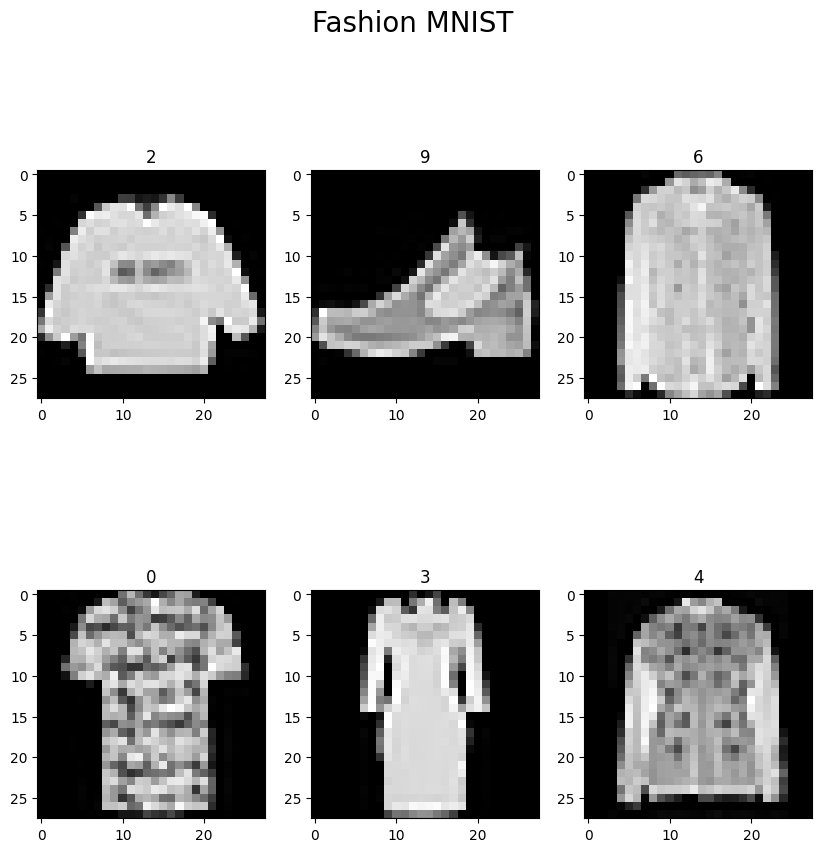

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
fig.suptitle("Fashion MNIST", fontsize=20)
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    ax.set_title(train_data.iloc[i, 0])
plt.show()

In [ ]:
X_train, y_train = train_data.drop('label', axis=1), train_data['label']
X_test, y_test = test_data.drop('label', axis=1), test_data['label']

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
# Create Dataset Instances
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)


In [ ]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# Hyperparameters
epochs = 100
learning_rate = 0.1

In [ ]:
# Initialize Model, Loss, and Optimizer
model = MyNN(X_train.shape[1])
model=model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
for epoch in range(epochs):
    total_epoch_loss = 0
    for x, y in train_loader:
        x=x.to(device)
        y=y.to(device)
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        total_epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}")


Epoch 1/100, Loss: 0.6891062669376574
Epoch 2/100, Loss: 0.444699019630517
Epoch 3/100, Loss: 0.3969511216097295
Epoch 4/100, Loss: 0.36781018282940137
Epoch 5/100, Loss: 0.3456147723297066
Epoch 6/100, Loss: 0.3281253848804721
Epoch 7/100, Loss: 0.3156586168512607
Epoch 8/100, Loss: 0.30358999493375005
Epoch 9/100, Loss: 0.29201555719126515
Epoch 10/100, Loss: 0.28324531093398647
Epoch 11/100, Loss: 0.27595642054957875
Epoch 12/100, Loss: 0.2684547900756412
Epoch 13/100, Loss: 0.2608856900668602
Epoch 14/100, Loss: 0.25299781133561755
Epoch 15/100, Loss: 0.24836625039243876
Epoch 16/100, Loss: 0.241194832950894
Epoch 17/100, Loss: 0.23626604474493182
Epoch 18/100, Loss: 0.2289523746031942
Epoch 19/100, Loss: 0.2243050243030352
Epoch 20/100, Loss: 0.22088434366481519
Epoch 21/100, Loss: 0.21661978437384563
Epoch 22/100, Loss: 0.21053866195335572
Epoch 23/100, Loss: 0.2064906067526671
Epoch 24/100, Loss: 0.2024507811551155
Epoch 25/100, Loss: 0.19925785120298614
Epoch 26/100, Loss: 0.19

In [ ]:
# Evaluate Model
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for x, y in test_loader:
        x=x.to(device)
        y=y.to(device)
        y_pred = model(x)
        _, predicted = torch.max(y_pred, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 89.39%
